# Big Mountain Resort
Big Mountain Resort has recently installed an additional chair lift to better serve visitors.The additional installation increases operating costs by $1,540,000, which negatively impacts the profit. The company needs to set the new ticket prices or reduce the cost to make sure there will be resources for capitalization of facilities as much as before.
Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (at the resorts). This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

Resources:

ski_resort_data.csv that contains data related to 330 resorts in the US.

Population and area data for the US states obtained from wikipedia. 

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

2.5 Load The Ski Resort Data

In [2]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('ski_resort_data.csv')

In [3]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

2.6 Explore The Data

2.6.1 Find Your Resort Of Interest

In [4]:
#Code task 4#
#Filter the ski_data dataframe to display just the row for our resort with the name 'Big Mountain Resort'
#transpose the extracted row gives a nicer output. 
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


    It's good that the Big Mountain Resort doesn't appear to have any missing values.

In [5]:
#Code task 5#
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


    fastEight has the most missing values, at just over 50%. Unfortunately, we see we're also missing quite a few of our desired target quantity, the ticket price, which is missing 15-16% of values. AdultWeekday is missing in a few more records than AdultWeekend.

2.6.3 Categorical Features

In [6]:
#Code task 6#
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


2.6.3.1 Unique Resort Names

In [7]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain    2
Mission Ridge       1
Hunter Mountain     1
Holiday Valley      1
Devils Head         1
Name: Name, dtype: int64

    There is a duplicated resort name: Crystal Mountain.

Q: 1 Is this resort duplicated if you take into account Region and/or state as well?

In [8]:
#Code task 8#
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Lost Valley, Maine                       1
Copper Mountain Resort, Colorado         1
Sunrise Park Resort, Arizona             1
Beech Mountain Resort, North Carolina    1
Brighton Resort, Salt Lake City          1
dtype: int64

In [9]:
#Code task 9#
#Concatenate 'Name' and 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Lost Valley, Maine                  1
Bluewood, Washington                1
Ski Apache, New Mexico              1
Copper Mountain Resort, Colorado    1
Oak Mountain, New York              1
dtype: int64

In [10]:
ski_data[ski_data.Name == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


    So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that you have unique records on each row.

2.6.3.2 Region And State

What's the relationship between region and state?

They are the same in many cases (e.g. both the Region and the state are given as 'Michigan'). In how many cases do they differ?

In [11]:
#Code task 10#
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).sum()

33

We know what a state is. What is a region? Let's tabulate the distinct values along with their respective frequencies using value_counts().

In [12]:
ski_data.Region.value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Montana                12
Idaho                  12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
Oregon                  6
North Carolina          6
Ohio                    5
Connecticut             5
Virginia                4
Illinois                4
West Virginia           4
Mt. Hood                4
Iowa                    3
Alaska                  3
South Dakota            2
Nevada                  2
New Jersey              2
Missouri                2
Indiana                 2
Arizona                 2
Rhode Island            1
Maryland                1
Northern California     1
Tennessee               1
Name: Region

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. 

In [13]:
#Code task 11#
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

2.6.3.3 Number of distinct regions and states

In [14]:
#Code task 12#
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

2.6.3.4 Distribution Of Resorts By Region And State

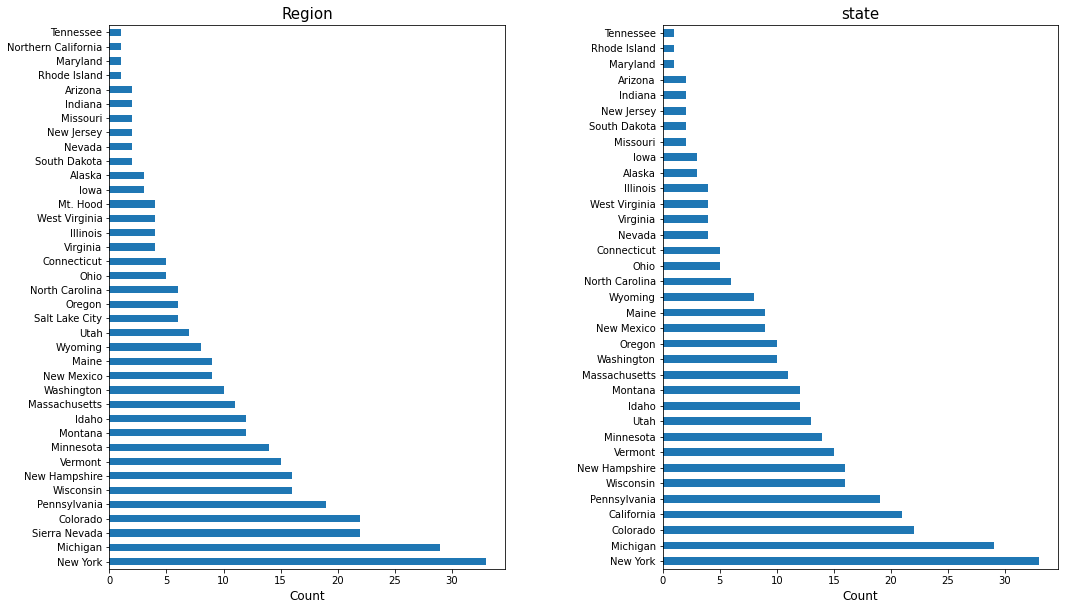

In [15]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots (1, 2, figsize=(17,10))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind= 'barh', ax= ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region',size =15)
#Label the xaxis 'Count'
ax[0].set_xlabel('Count',size =12)
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax= ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state',size =15)
#Label the xaxis 'Count'
ax[1].set_xlabel('Count',size =12)
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace= 0.4);

Looking at the distribution of States, we see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 12th place. 
Does New York command a premium because of its proximity to population? 
We can look  at a boxplot grouped by State is an ideal way to quickly compare prices. Another side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. 
But here, we'll see if we can find any supporting evidence for treating states the same or differently.

2.6.3.5 Distribution Of Ticket Price By State

Our primary focus is the Big Mountain resort, in Montana. Does the state give us any clues to help decide what our primary target response feature should be (weekend or weekday ticket prices)?

2.6.3.5.1 Average weekend and weekday price by state

In [16]:
#Code task 14#
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


    The figure above represents a dataframe with two columns, one for the average prices of each kind of ticket. This tells us how the average ticket price varies from state to state. 
    But can we get more insight into the difference in the distributions between states:

Text(0.5, 0, 'Price ($)')

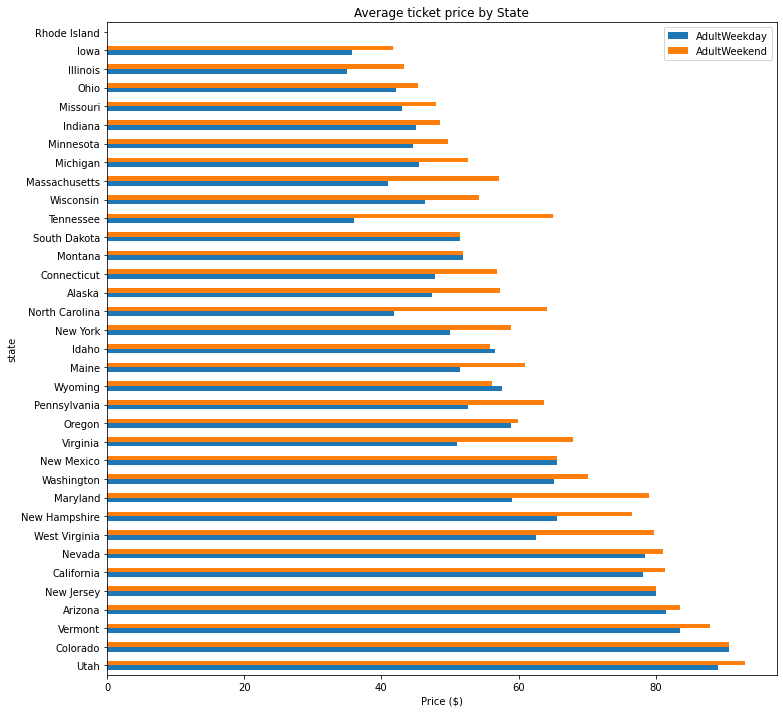

In [17]:
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index= state_price_means.mean(axis=1)
                           .sort_values(ascending= False).index)
                           .plot(kind='barh', figsize= (12,12), title= 'Average ticket price by State'))
plt.xlabel('Price ($)')

2.6.3.5.2 Distribution of weekday and weekend price by state

Next, we can transform the data into a single column for price with a new categorical column that represents the ticket type.

In [18]:
#Code task 15#
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']]
        , id_vars= 'state'
        , value_vars= ['AdultWeekday', 'AdultWeekend']
        , var_name= 'Ticket'
        , value_name= 'Price')

In [19]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


This is now in a format we can pass to seaborn's boxplot function to create boxplots of the ticket price distributions for each ticket type for each state.

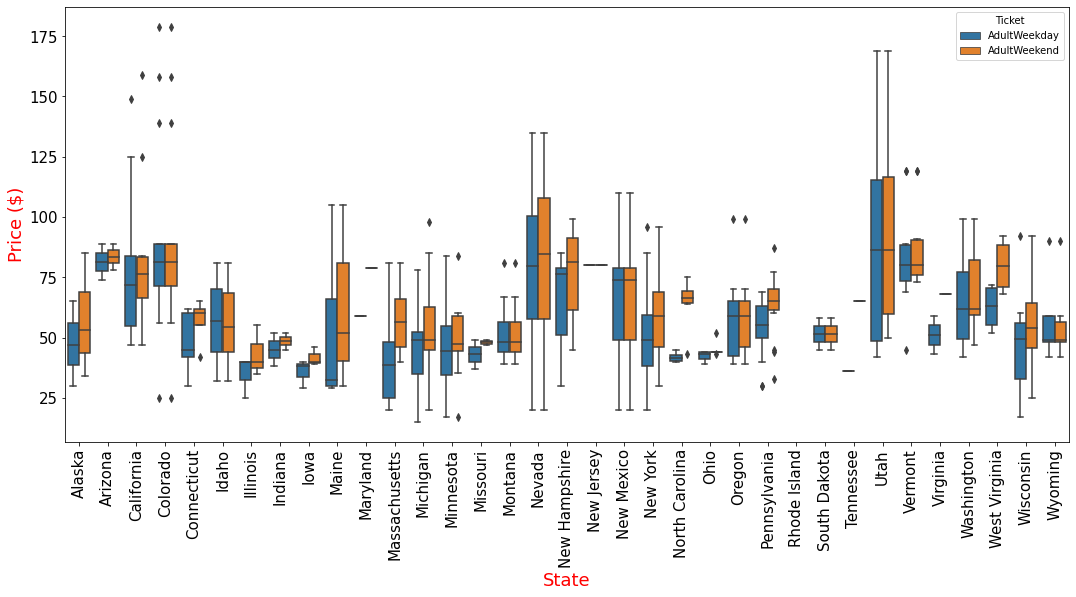

In [20]:
#Code task 16#
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(18,8))
sns.boxplot(x= 'state', y= 'Price', hue= 'Ticket', data=ticket_prices)
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.ylabel('Price ($)', size=18, color= 'red')
plt.xlabel('State', size=18, color= 'red');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. We could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, we're told that we are taking all resorts to be part of the same market share, we could argue against further segment the resorts. Nevertheless, ways to consider using the State information in our modelling include:

disregard State completely

retain all State information

retain State in the form of Montana vs not Montana, as our target resort is in Montana
We've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

Thus we currently have two main questions we want to resolve:

What do we do about the two types of ticket price?
What do we do about the state information?

2.6.4 Numeric Features

Having decided to reserve judgement on how exactly we utilize the State, turn our attention to cleaning the numeric features.

2.6.4.1 Numeric data summary

In [21]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Recall we're missing the ticket prices for some 16% of resorts. But we may have a weekend price and not a weekday price, or vice versa. We want to keep any price we have.

In [22]:
missing_price = ski_data[['AdultWeekend','AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price)*100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

2.6.4.2 Distributions Of Feature Values


Although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. 

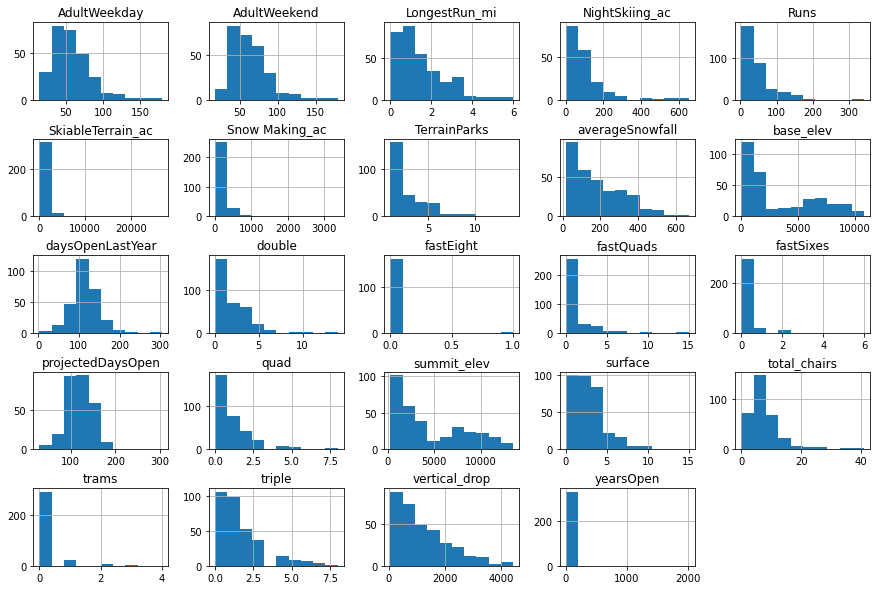

In [23]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

What features do we have possible cause for concern about and why?

SkiableTerrain_ac because values are clustered down the low end, and Snow Making_ac for the same reason,

fastEight because all but one value is 0 so it has very little variance, and half the values are missing,

fastSixes raises an amber flag; it has more variability, but still mostly 0, trams also may get an amber flag for the same reason,

yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

2.6.4.2.1 SkiableTerrain_ac

In [24]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

Q: One resort has an incredibly large skiable terrain area! Which is it?

In [25]:
#Code task 20#
#Now we know there's only one, print the whole row to investigate all values, including seeing the resort name
#transposition will be helpful here
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0
fastSixes,0
fastQuads,0


But there is a record that seems highly suspicious (SkiableTerrain_ac	26819)!

Check if our data are correct. Search for "silverton mountain skiable area". We see our top and base elevation values agree, but the skiable area is very different. Our suspect value is 26819, but the value We've just looked up is 1819. 

'The mountain boasts 1,819 acres of lift accessed terrain' (https://en.wikipedia.org/wiki/Silverton_Mountain).

In [26]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [27]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

What does the distribution of skiable area look like now

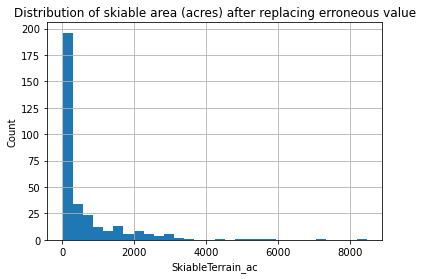

In [28]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

We now see a rather long tailed distribution.

2.6.4.2.2 Snow Making_ac

In [29]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [30]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0
fastSixes,2
fastQuads,7


  Let's check this suspect skiable area value. Based on Heavenly Mountain Resort website, snowmaking covers 60% of the trails.
  https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx

  What, then, is our rough guess for the area covered by snowmaking?

In [31]:
.60 * 4800

2880.0

This is less than the value of 3379 in our data so we may have a judgement call to make. However, notice something else. We have no ticket pricing information at all for this resort. We'll simply be dropping the entire row!

2.6.4.2.3 fastEight

Look at the different fastEight values more closely:

In [32]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [33]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns= 'fastEight', inplace=True)

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [34]:
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

One seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall we do about this?

What does the distribution of yearsOpen look like if we exclude just the obviously wrong one?

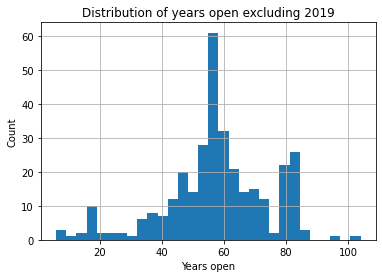

In [35]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. We can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. It could also mean the resort is due to open in 2019. We don't know when these data were gathered!

Let's review the summary statistics for the years under 1000.

In [36]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. We can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, we would be adding a new youngest resort so it feels best to simply drop this row.

In [37]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

2.6.4.2.4 fastSixes and Trams
    
The other features we had mild concern over, we will not investigate further. Perhaps take some care when using these features.

# 2.7 Derive State-wide Summary Statistics For Our Market Segment

We have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using our business knowledge, we know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

Although we don't know what those resorts charge for their tickets, we do know the resorts exists and have been open for at least six years. Thus, we'll now calculate some state-wide summary statistics for later use.

Many features in our data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that we may be interested in are:

TerrainParks

SkiableTerrain_ac

daysOpenLastYear

NightSkiing_ac

When we think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. We might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

A fairly new groupby behaviour is named aggregation. This allows us to clearly perform the aggregations we want whilst also creating informative output column names.

In [38]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state = pd.NamedAgg(column= 'Name', aggfunc='size'),
    state_total_skiable_area_ac = pd.NamedAgg(column= 'SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open = pd.NamedAgg(column= 'daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks = pd.NamedAgg(column= 'TerrainParks', aggfunc= 'count'),
    state_total_nightskiing_ac = pd.NamedAgg(column='NightSkiing_ac', aggfunc= 'count')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,3,2
1,Arizona,2,1577.0,237.0,2,1
2,California,21,25948.0,2738.0,19,4
3,Colorado,22,43682.0,3258.0,20,4
4,Connecticut,5,358.0,353.0,4,5


# 2.8 Drop Rows With No Price Data

Two columns of 'AdultWeekend' and 'AdultWeekday' refer to price. We can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [39]:
missing_price = ski_data[['AdultWeekday', 'AdultWeekend']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price)*100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [40]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

# 2.9 Review distributions

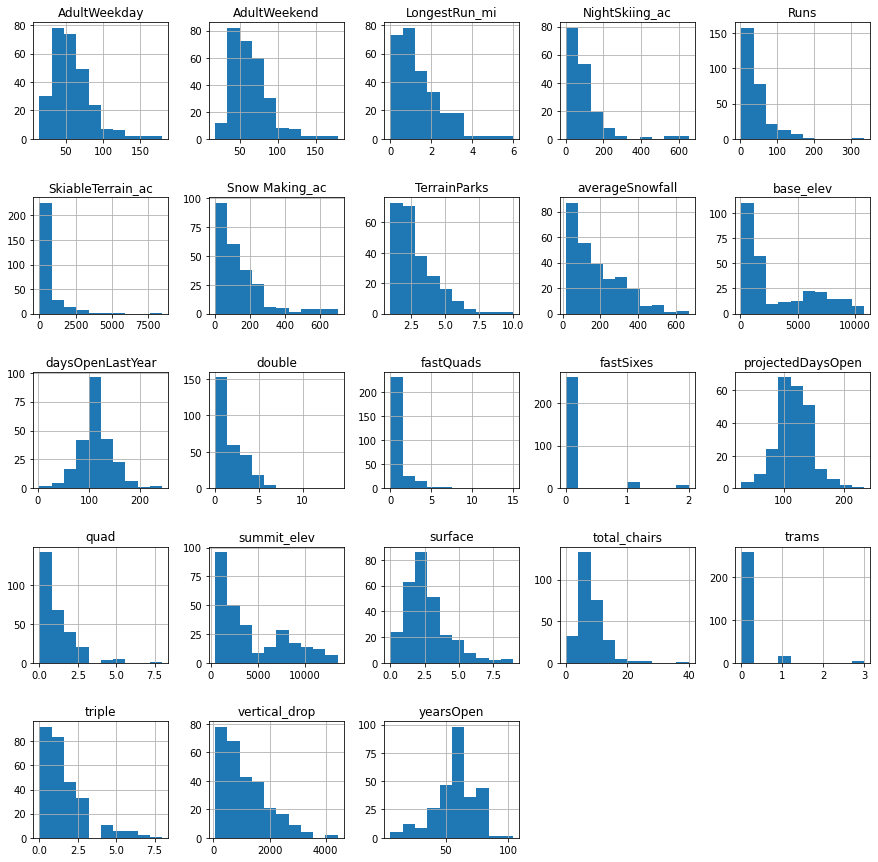

In [41]:
ski_data.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on fastQuads, fastSixes, and perhaps trams. These lack much variance away from 0 and may have a small number of relatively extreme values. Models failing to rate a feature as important when domain knowledge tells us it should be is an issue to look out for, as is a model being overly influenced by some extreme values. If we build a good machine learning pipeline, hopefully it will be robust to such issues, but we may also wish to consider nonlinear transformations of features.

# 2.10 Population data

Population and area data for the US states can be obtained from wikipedia. 

In [42]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states'
usa_states = pd.read_html(states_url)

In [43]:
type(usa_states)

list

In [44]:
len(usa_states)

1

In [45]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[upper-alpha 1] Population[upper-alpha 2][3] Total area[4]  \
  Established[upper-alpha 1] Population[upper-alpha 2][3]           mi2   
0               Dec 14, 1819                      4903185         52420   
1                Jan 3, 1959                       731545        665384   
2               Feb 14, 1912                      7278717        113990   
3               Jun 15, 1836                      3017804         53179   
4                Sep 9, 1850                     39512223        163695   

           Land area[4]          Water area[4]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [46]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [47]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[upper-alpha 1], Established[upp

Extract the state name, population, and total area (square miles) columns.

In [48]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population','state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [49]:
missing_states= set(state_summary.state)-set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

If we look at the table on the web, we can perhaps start to guess what the problem is. We can confirm your suspicion by pulling out state names that contain 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [50]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[upper-alpha 3]
37     Pennsylvania[upper-alpha 3]
38     Rhode Island[upper-alpha 4]
45         Virginia[upper-alpha 3]
47                   West Virginia
Name: state, dtype: object

Let's delete square brackets and their contents and try again:

In [51]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace= '\[.*\]', value= '', regex= True ,inplace= True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [52]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

We have an empty set for missing states now. We can add the population and state area columns to the ski resort data.

In [53]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, on = 'state', how = 'left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,3,2,731545,665384
1,Arizona,2,1577.0,237.0,2,1,7278717,113990
2,California,21,25948.0,2738.0,19,4,39512223,163695
3,Colorado,22,43682.0,3258.0,20,4,5758736,104094
4,Connecticut,5,358.0,353.0,4,5,3565278,5543


# 2.11 Target Feature

Finally, what will our target be when modelling ticket price? What relationship is there between weekday and weekend prices?

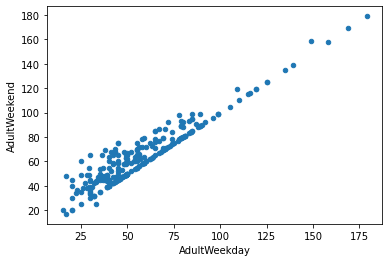

In [54]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x= 'AdultWeekday', y='AdultWeekend', kind='scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [55]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend','AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [56]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [57]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [58]:
ski_data.shape

(277, 25)

2.11.1 Number Of Missing Values By Row - Resort

Having dropped rows missing the desired target ticket price, what degree of missingness do we have for the remaining rows?

In [59]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


These seem possibly curiously quantized...

In [60]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [61]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

This is almost as if values have been removed artificially... Nevertheless, what we don't know is how useful the missing features are in predicting ticket price. we shouldn't just drop rows that are missing several useless features.

In [62]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

# 2.12 Save data

In [63]:
ski_data.shape

(277, 25)

In [64]:
# save the data to a new csv file
ski_data.to_csv('ski_data_cleaned.csv', index= False)

In [65]:
# save the state_summary separately.
state_summary.to_csv('state_summary.csv', index= False)

# 2.13 Summary

ski_data had 330 rows and 27 columns. Each row contains information about a special resort located in the particular of a state. Row of 151 was the Big Mountain Resort that didn't have any missing value. Some columns had missing values, 'fastEight' had the most misssing value, at just over 50% and 'NightSkiing_ac'with 43.33% missing value. Ticket prices, 'AdultWeekday' and 'AdultWeekend' as the desired target values had 16.36% and 15.45% missing value respectively. Three of columns including Name, Region and state were categorical features. Although two of resorts had the same name(but in different Region and state), there were unique records in each row. In many cases Region and state were the same, but majority of differences were seen in California. There were some relatively expensive ticket prices in California, Colorado, and Utah, but most prices appeared to lie in a broad band from around 25 to over 100 dollars. Some state like Montana and South Dakota showed fairly small variability as well as matching weekend and weekday ticket prices. Just over 82% of resorts had no missing ticket price, 3% were missing one value, and 14% were missing both weekend and weekday prices. We droped the fastEight column in its entirety because half the values are missing and all but the others are the value zero. Also, one resort with yearsOpen record of 2019 was droped because it seemed a resort that might not have been opened yet, or perhaps in its first season. About 14% of the rows had no price data, since the price is our target, those rows were droped. The weekend and weekday prices were equal for resorts with price higher than 100 dollars. And Weekend price were higher htan Weekday price seemed restricted to resorts with price less than 100 dollars. Weekend prices had 4 missing values while Weekday prices with 7 missing values, so we droped the weekday prices and then keep just the rows that had weekend price. Finally, the cleaned data had 277 rows and 25 columns with quit few missing values. 
Then we add two columns of 'state_population' and 'state_area_sq_miles' from a dataset in Wiki to the cleaned data. The reslut dataset was state_summary.